### Running `inference.py` will produce results in this folder `results_2018`.

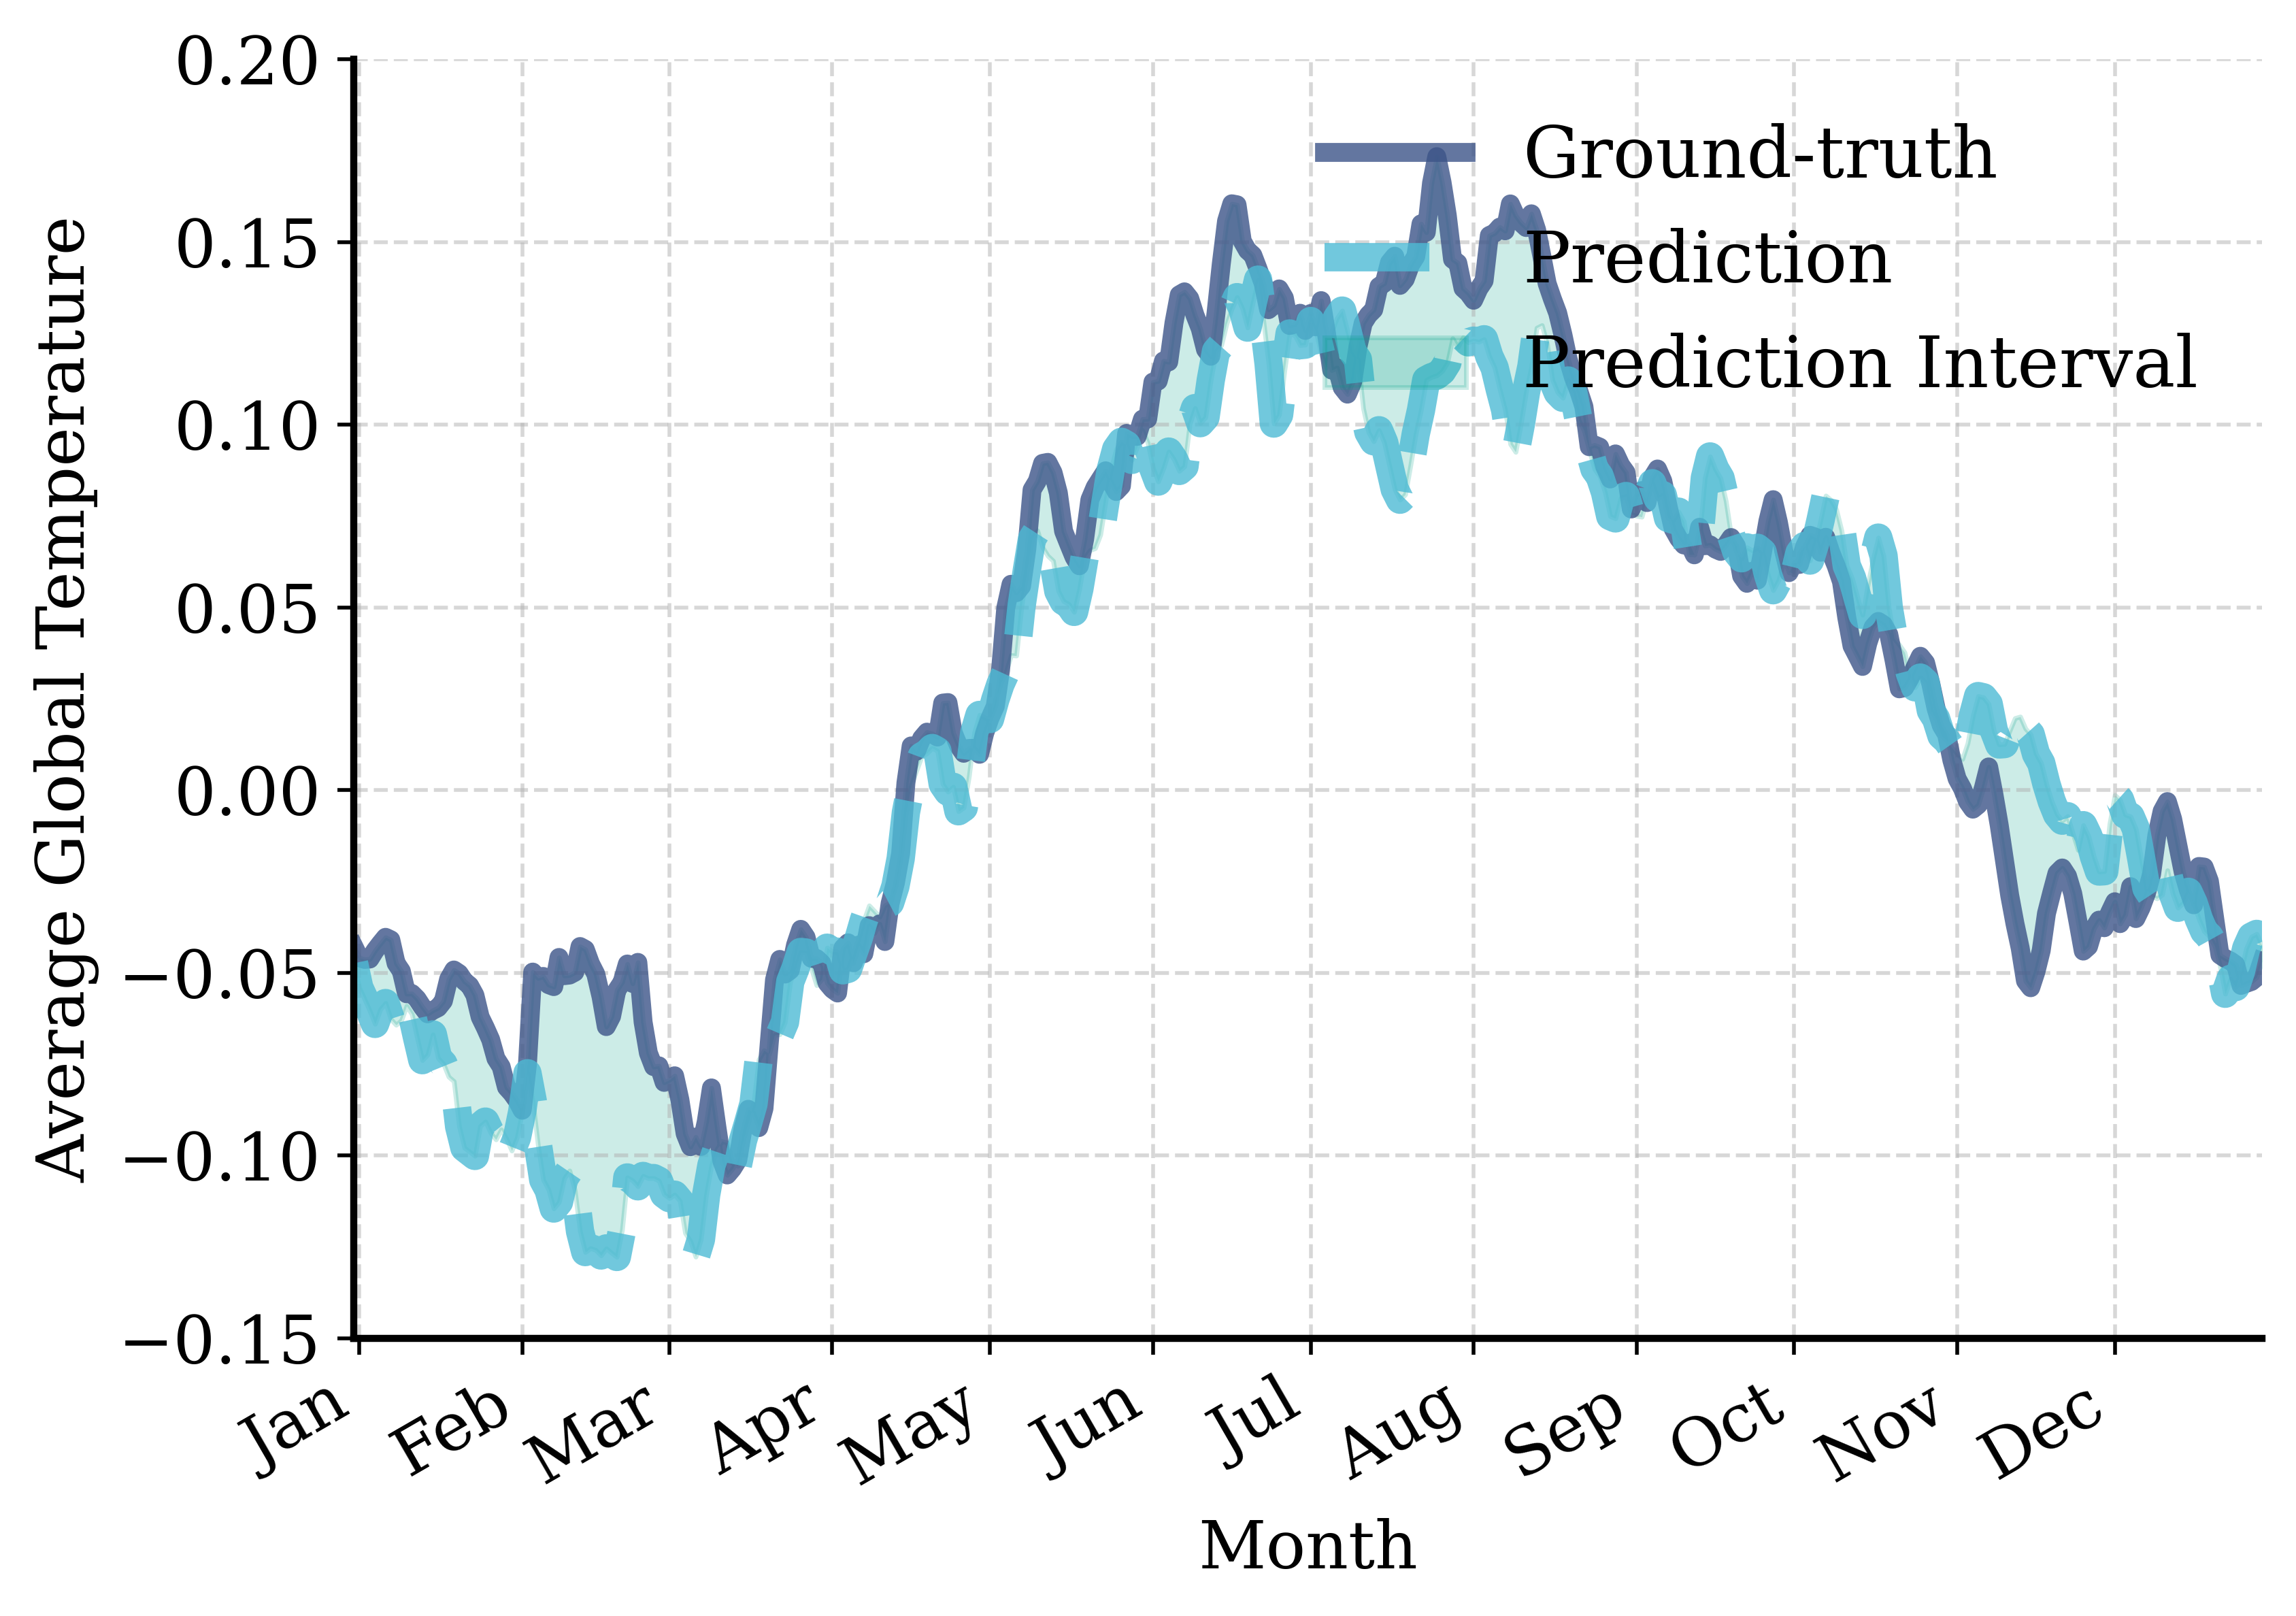

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import h5py
import torch
import numpy as np
from matplotlib.ticker import FormatStrFormatter  
import matplotlib.lines as mlines  

plt.rcParams["font.family"] = "DejaVu Serif"

color = {
    0: '#E64B35CC',
    1: '#4DBBD5CC',
    2: '#3C5488CC',
    3: '#00A087CC',
    4: '#F39B7FCC',
    5: '#8491B4CC',
    6: '#91D1C2CC',
}

backbone = 'triton_weather_20250326_v1'
inint_condiction = np.load(f'{backbone}_initial_input.npy')
var_index = 2

ground_truth_avg_temps = []
prediction_avg_temps = []

for day in range(364):
    ground_truth = np.load(f'{backbone}_true_label_step_{day}.npy')
    prediction = np.load(f'{backbone}_prediction_step_{day}.npy')
    
    ground_truth_temp = ground_truth[var_index]
    prediction_temp = prediction[var_index]
    # print(ground_truth_temp. shape, prediction_temp.shape)
    
    ground_truth_avg_temps.append(np.mean(ground_truth_temp))
    prediction_avg_temps.append(np.mean(prediction_temp))

month_starts = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(7, 5), dpi=500)
plt.plot(ground_truth_avg_temps, label='Ground-truth', color=color[2], linewidth=4)
plt.plot(prediction_avg_temps, label='Prediction', color=color[1], linewidth=6, linestyle='--')

plt.fill_between(range(364), ground_truth_avg_temps, prediction_avg_temps, 
                 color=color[3], alpha=0.2, label='Prediction Interval')

plt.xticks(month_starts, month_labels, rotation=30, ha='right', fontsize=14)
plt.yticks(fontsize=14)  

plt.xticks(month_starts, month_labels, rotation=30, ha='right')
plt.xlim(0, 363)
plt.ylim([-0.15, 0.2])

plt.legend(loc='upper right', frameon=False)
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylabel('Average Global Temperature', fontsize=14)
plt.xlabel('Month', fontsize=14)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig("2018.png", dpi=600)
plt.show()

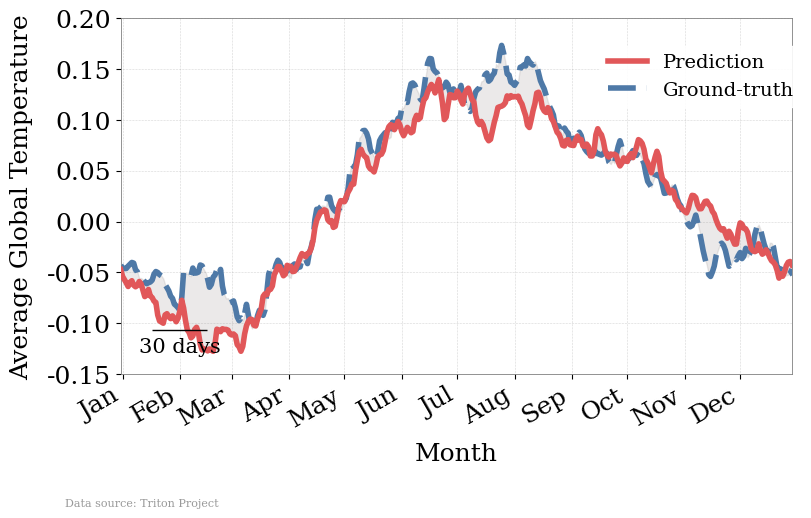

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.family': 'sans-serif',  
    'font.sans-serif': 'DejaVu Serif',
    'axes.labelsize': 18,
    'axes.titlesize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'legend.fontsize': 10,
    'lines.linewidth': 4,
    'axes.linewidth': 0.8,  
    'grid.linewidth': 0.4,
    'savefig.dpi': 600,
    'figure.figsize': (8.9, 5.6),  
    'axes.prop_cycle': plt.cycler('color', ['#4E79A7', '#E15759'])  #
})

backbone = 'triton_weather_20250326_v1'
inint_condiction = np.load(f'{backbone}_initial_input.npy')
var_index = 2

ground_truth_avg_temps = []
prediction_avg_temps = []

for day in range(364):
    ground_truth = np.load(f'{backbone}_true_label_step_{day}.npy')
    prediction = np.load(f'{backbone}_prediction_step_{day}.npy')
    
    ground_truth_temp = ground_truth[var_index]
    prediction_temp = prediction[var_index]
    # print(ground_truth_temp. shape, prediction_temp.shape)
    
    ground_truth_avg_temps.append(np.mean(ground_truth_temp))
    prediction_avg_temps.append(np.mean(prediction_temp))

month_starts = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, ax = plt.subplots()

main_line = ax.plot(prediction_avg_temps, 
                   color='#E15759',  
                   linestyle='-',
                   label='Prediction',
                   zorder=3)

truth_line = ax.plot(ground_truth_avg_temps, 
                    color='#4E79A7',  
                    linestyle=(0, (5, 2)), 
                    label='Ground-truth',
                    zorder=2)

fill = ax.fill_between(range(364), 
                      ground_truth_avg_temps, 
                      prediction_avg_temps,
                      color='#79706E',  
                      alpha=0.15,
                      zorder=1)

ax.set_xticks(month_starts)
ax.set_xticklabels(month_labels, rotation=30, ha='right')
ax.set_xlim(0, 363)

ax.set_ylim(-0.15, 0.2)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))
ax.set_ylabel('Average Global Temperature', labelpad=10)
ax.set_xlabel('Month', labelpad=8)

ax.grid(True, axis='both', linestyle=':', color='gray', alpha=0.6)
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('gray')
    spine.set_linewidth(0.6)

legend = ax.legend(
    frameon=True,
    fontsize=14,   
    framealpha=0.9,
    edgecolor='white',
    facecolor='white',
    bbox_to_anchor=(0.7, 0.95), 
    borderaxespad=0.5
)

from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
scalebar = AnchoredSizeBar(ax.transData,
                          30, '30 days',
                          loc='lower left',
                          pad=0.1,
                          borderpad=1.2,
                          sep=5,
                          frameon=False)
ax.add_artist(scalebar)

fig.text(0.12, 0.02, 'Data source: Triton Project', 
        fontsize=8, color='gray', alpha=0.8)

plt.tight_layout(pad=2.5)  
plt.savefig('nature_style_temp_trend.pdf',  
           dpi=600, 
           bbox_inches='tight',
           transparent=True)
plt.show()

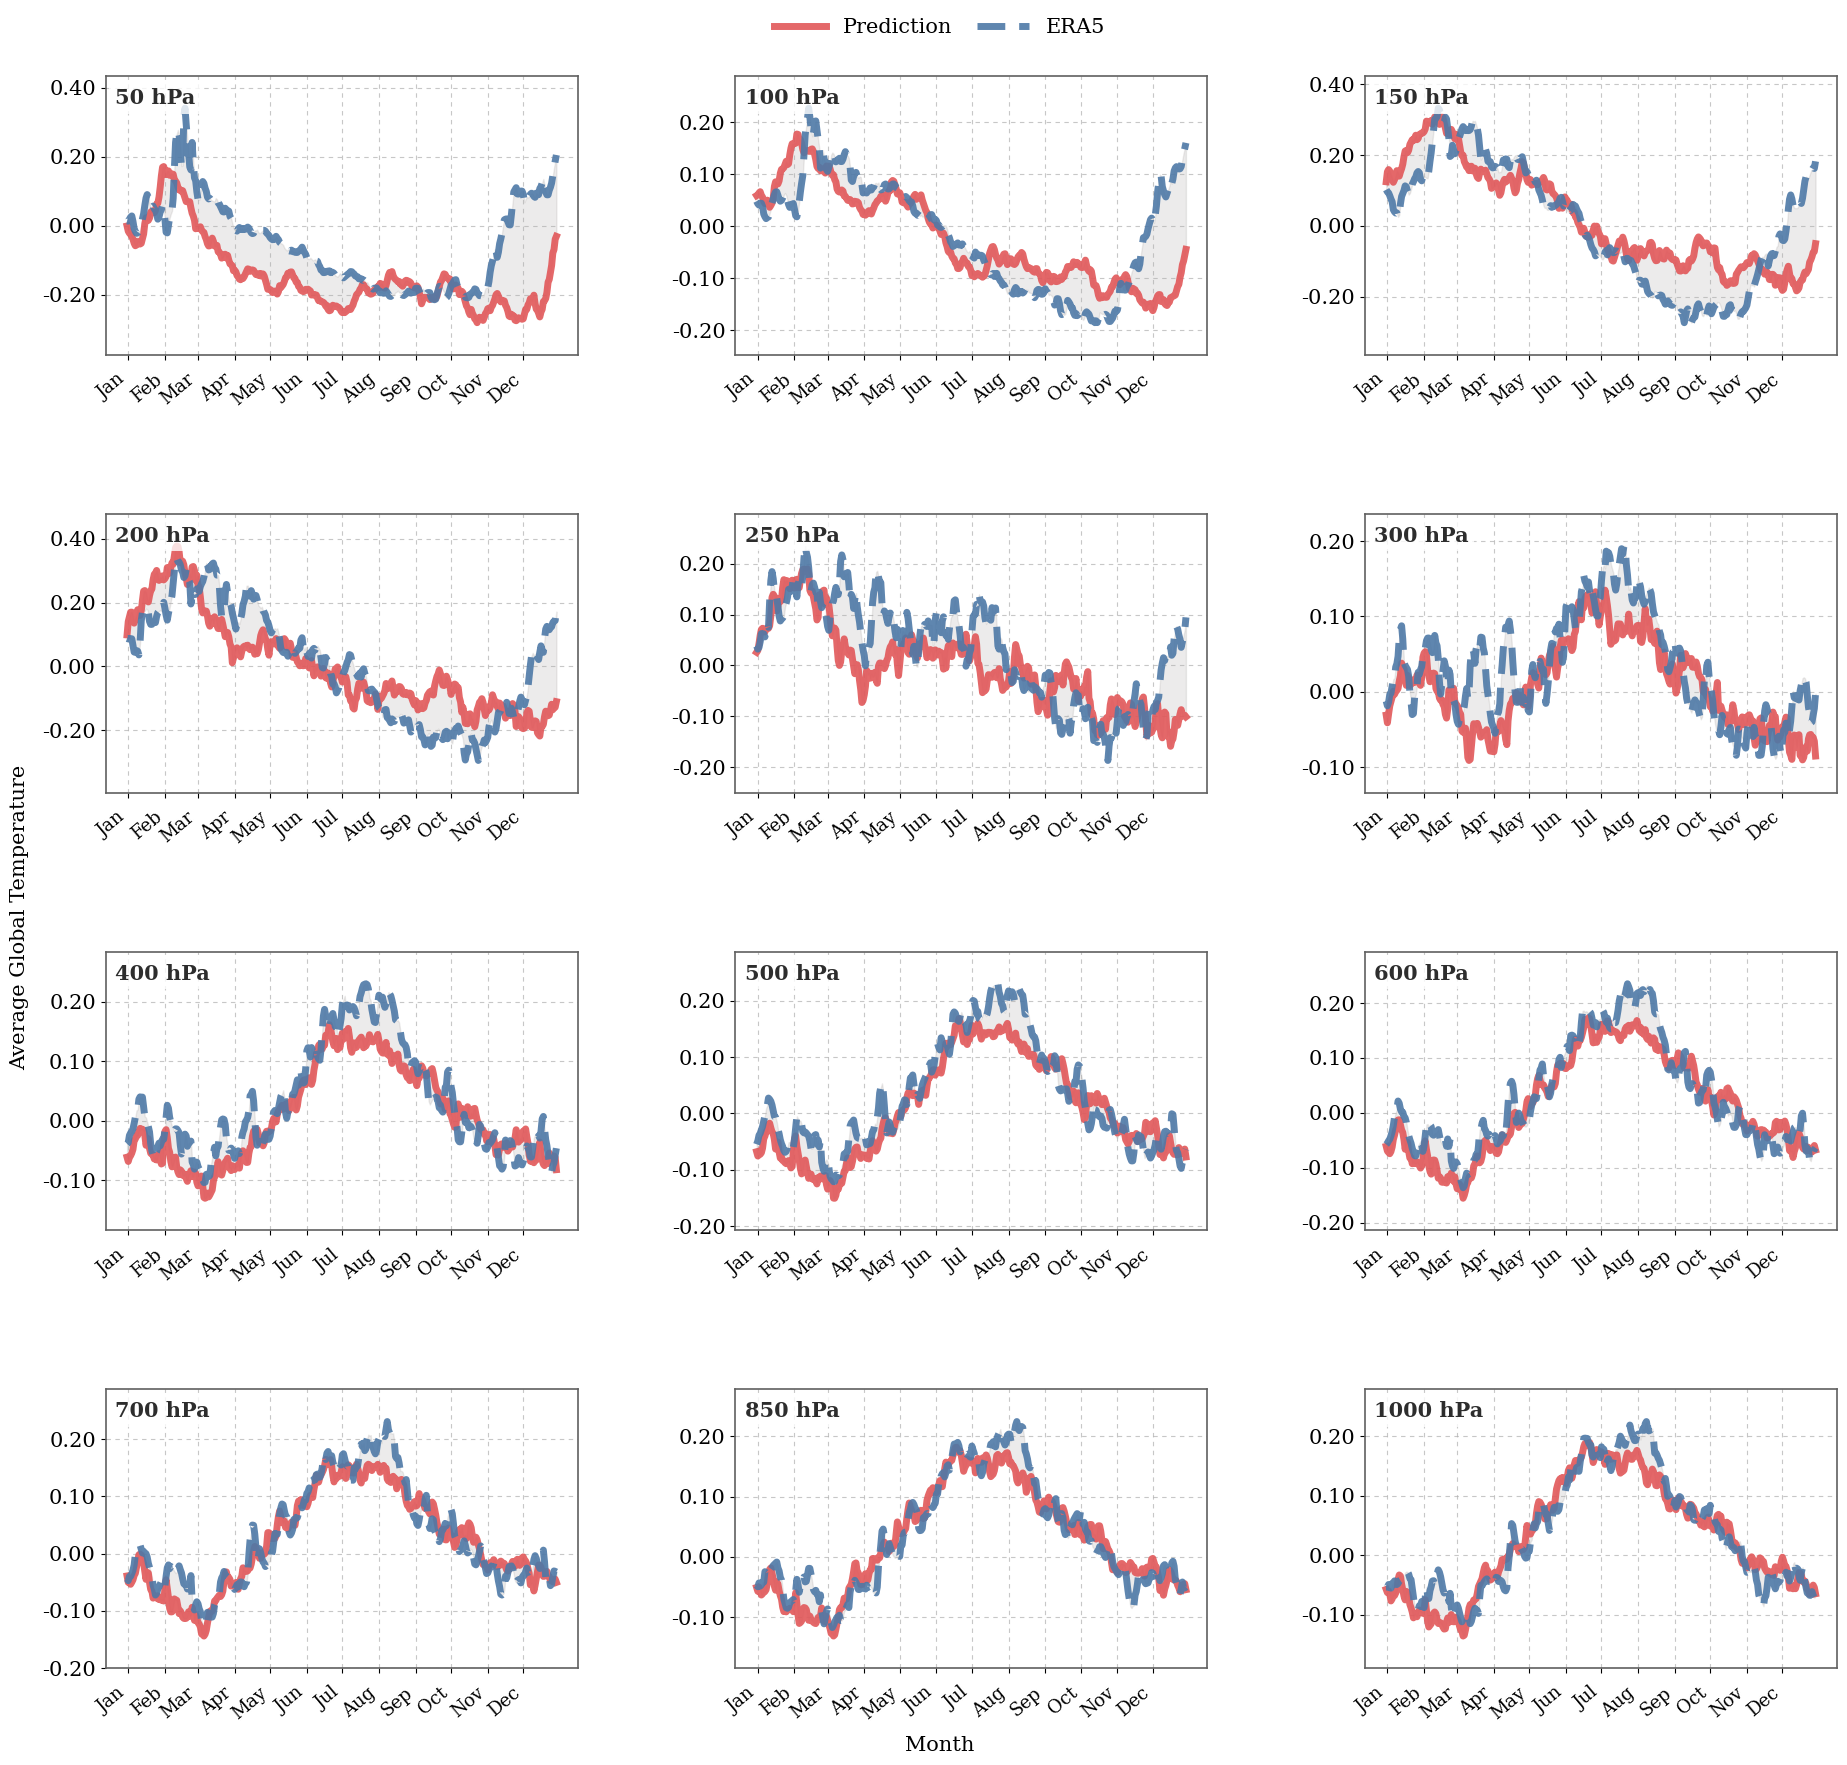

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.size': 15,
    'axes.labelsize': 15,
    'axes.titlesize': 15,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'legend.fontsize': 15,
    'lines.linewidth': 5.0,
    'axes.linewidth': 1.5,
    'grid.linewidth': 0.8,
    'savefig.dpi': 600,
    'figure.figsize': (20, 15),
    'axes.prop_cycle': plt.cycler('color', ['#2E5C8A', '#C23B22']),
    'figure.facecolor': 'white'
})

color = {
    0: '#E64B35CC',
    1: '#4DBBD5CC',
    2: '#3C5488CC',
    3: '#00A087CC',
    4: '#F39B7FCC',
    5: '#8491B4CC',
    6: '#91D1C2CC',
}

selected_levels = [
    (50, 0), (100, 1), (150, 2), 
    (200, 3), (250, 4), (300, 5),
    (400, 6), (500, 7), (600, 8),
    (700, 9), (850, 10), (1000, 11)
]

fig, axs = plt.subplots(4, 3, figsize=(20, 18))
axs = axs.ravel()

cache = {}

for idx, (level, level_idx) in enumerate(selected_levels):
    ax = axs[idx]
    
    ax.text(0.02, 0.90, f'{level} hPa', 
           transform=ax.transAxes,
           fontsize=15,
           fontweight='bold',
           color='#2D2D2D',
           bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
    
    var_index = 4 + 2 * 13 + level_idx
    
    if var_index not in cache:
        ground_truth_avg = []
        prediction_avg = []
        
        for day in range(364):
            ground_truth = np.load(f'{backbone}_true_label_step_{day}.npy')
            prediction = np.load(f'{backbone}_prediction_step_{day}.npy')
            
            ground_truth_avg.append(np.mean(ground_truth[var_index]))
            prediction_avg.append(np.mean(prediction[var_index]))
        
        cache[var_index] = (ground_truth_avg, prediction_avg)
    else:
        ground_truth_avg, prediction_avg = cache[var_index]

    ax.plot(prediction_avg, color='#E15759', label='Prediction', alpha=0.9)
    ax.plot(ground_truth_avg, color='#4E79A7', linestyle=(0, (4, 2)), 
           label='ERA5', alpha=0.9)
    
    ax.fill_between(range(364), ground_truth_avg, prediction_avg,
                   color='#6A6260', alpha=0.12)

    ax.set_xticks(month_starts)
    ax.set_xticklabels(month_labels, 
                      rotation=40, 
                      ha='right',
                      fontsize=13,
                      position=(0, -0.02))
    
    combined = ground_truth_avg + prediction_avg
    y_padding = (max(combined) - min(combined)) * 0.15
    ax.set_ylim(min(combined)-y_padding, max(combined)+y_padding)
    
    ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
    
    ax.grid(True, axis='both', linestyle=(0, (4, 4)), color='#B0B0B0', alpha=0.7)
    
    for spine in ax.spines.values():
        spine.set_color('#606060')
        spine.set_linewidth(1.2)

handles, labels = axs[0].get_legend_handles_labels()
legend = fig.legend(
    handles, labels,
    loc='upper center',
    ncol=2,
    bbox_to_anchor=(0.5, 1.01),  
    frameon=False,
    handlelength=2.5,
    borderaxespad=0.5, 
    columnspacing=1.2    
)

fig.text(0.5, 0.04, 'Month',
        ha='center', va='center', 
        fontsize=15, fontweight='medium')
fig.text(0.04, 0.5, 'Average Global Temperature', 
        rotation=90, ha='center', va='center', 
        fontsize=15, fontweight='medium')

plt.tight_layout(rect=[0.04, 0.04, 0.96, 0.98], h_pad=5.0, w_pad=4.5)  

plt.savefig('multi_level_temperature_trends.png',
           dpi=600,
           bbox_inches='tight',
           facecolor=fig.get_facecolor(),  
           edgecolor='none')

plt.show()

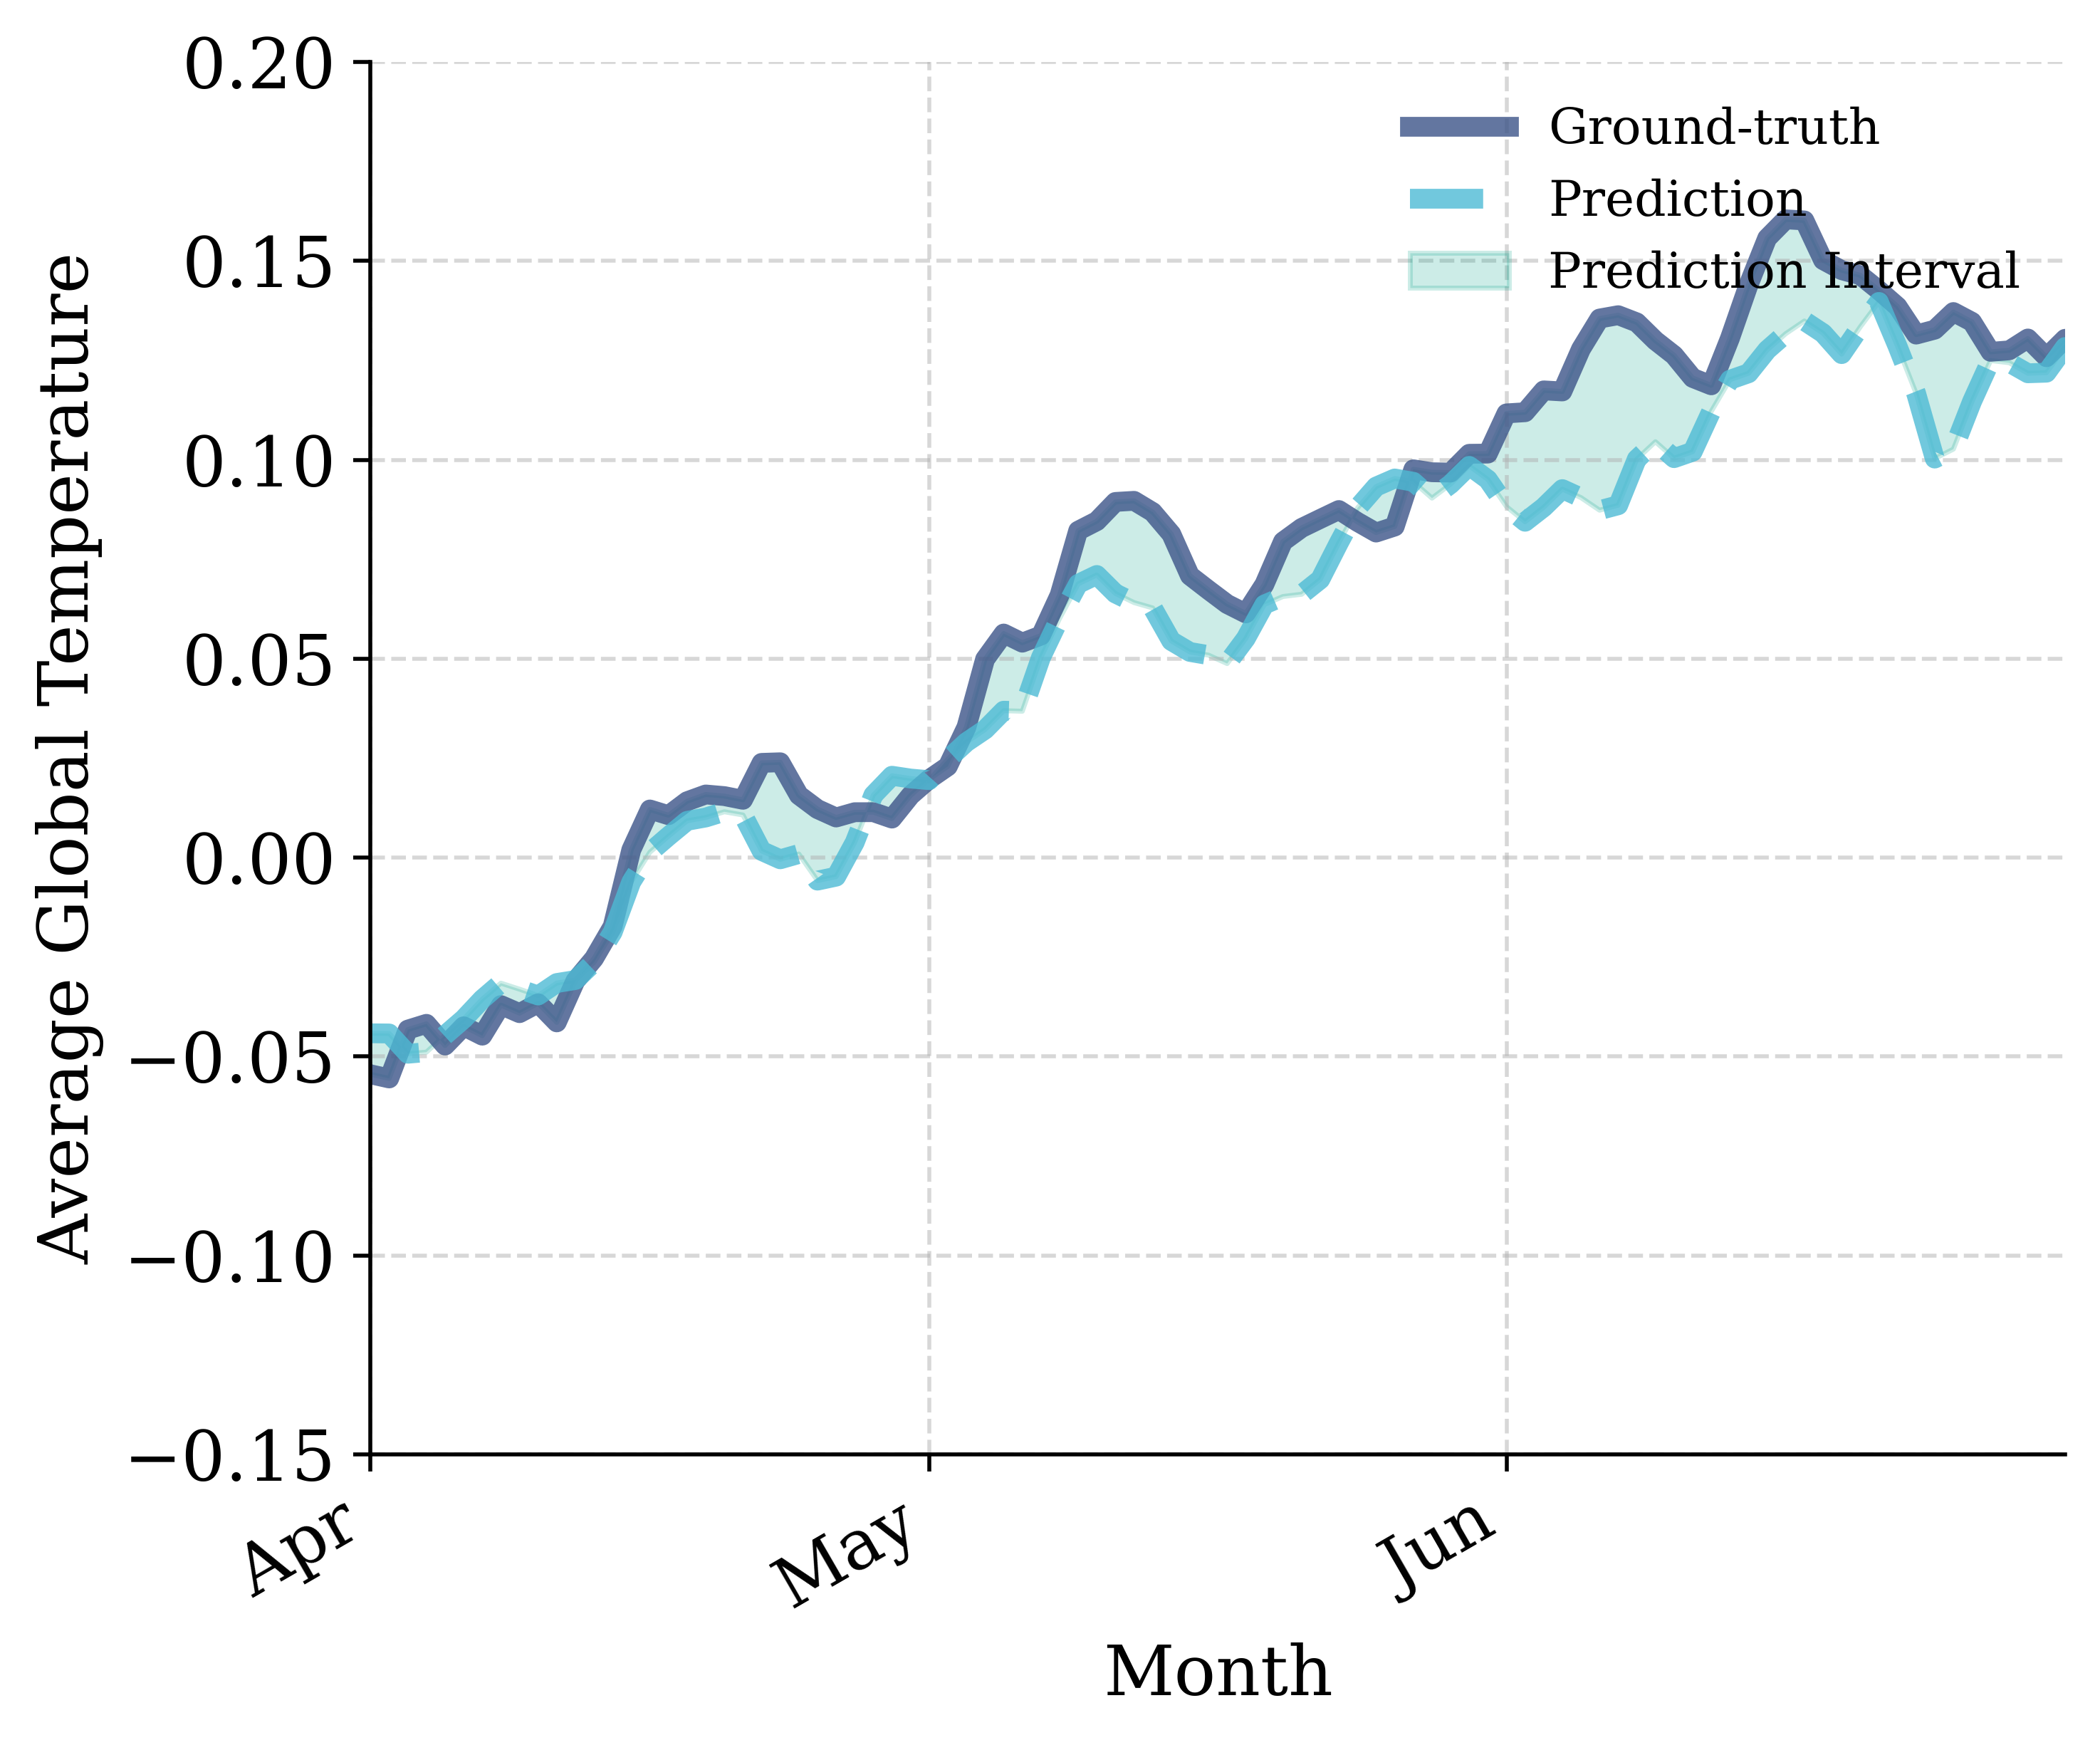

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import torch
from matplotlib.ticker import FormatStrFormatter
import matplotlib.lines as mlines

plt.rcParams["font.family"] = "DejaVu Serif"

color = {
    0: '#E64B35CC',
    1: '#4DBBD5CC',
    2: '#3C5488CC',
    3: '#00A087CC',
    4: '#F39B7FCC',
    5: '#8491B4CC',
    6: '#91D1C2CC',
}

backbone = 'triton_weather_20250326_v1'
inint_condiction = np.load(f'{backbone}_initial_input.npy')
var_index = 2

ground_truth_avg_temps = []
prediction_avg_temps = []

for day in range(364):
    ground_truth = np.load(f'{backbone}_true_label_step_{day}.npy')
    prediction = np.load(f'{backbone}_prediction_step_{day}.npy')
    
    ground_truth_temp = ground_truth[var_index]
    prediction_temp = prediction[var_index]
    
    ground_truth_avg_temps.append(np.mean(ground_truth_temp))
    prediction_avg_temps.append(np.mean(prediction_temp))

selected_months_starts = [91, 121, 152]  # April:91, May:121, June:152
selected_months_labels = ['Apr', 'May', 'Jun']

plt.figure(figsize=(6, 5), dpi=500)
plt.plot(ground_truth_avg_temps, label='Ground-truth', color=color[2], linewidth=4)
plt.plot(prediction_avg_temps, label='Prediction', color=color[1], linewidth=4, linestyle='--')

plt.fill_between(range(364), ground_truth_avg_temps, prediction_avg_temps, 
                 color=color[3], alpha=0.2, label='Prediction Interval')

plt.xlim(selected_months_starts[0], selected_months_starts[-1]+30) 
plt.ylim([-0.15, 0.2])

plt.xticks(selected_months_starts, selected_months_labels, 
           rotation=30, ha='right', fontsize=14)
plt.yticks(fontsize=14)

plt.legend(loc='upper right', frameon=False)
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylabel('Average Global Temperature', fontsize=14)
plt.xlabel('Month', fontsize=14)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import h5py
import torch
import numpy as np
from matplotlib.ticker import FormatStrFormatter  

plt.rcParams["font.family"] = "DejaVu Serif"

color = {
    0: '#E64B35CC',
    1: '#4DBBD5CC',
    2: '#3C5488CC',
    3: '#00A087CC',
    4: '#F39B7FCC',
    5: '#8491B4CC',
    6: '#91D1C2CC',
}

backbone = 'triton_weather_20250326_v1'
inint_condiction = np.load(f'{backbone}_initial_input.npy')
var_index = 2

ground_truth_avg_temps = []
prediction_avg_temps = []

for day in range(364):
    ground_truth = np.load(f'{backbone}_true_label_step_{day}.npy')
    prediction = np.load(f'{backbone}_prediction_step_{day}.npy')
    
    ground_truth_temp = ground_truth[var_index]
    prediction_temp = prediction[var_index]
    print(ground_truth_temp. shape, prediction_temp.shape)
    break
    

(180, 360) (180, 360)


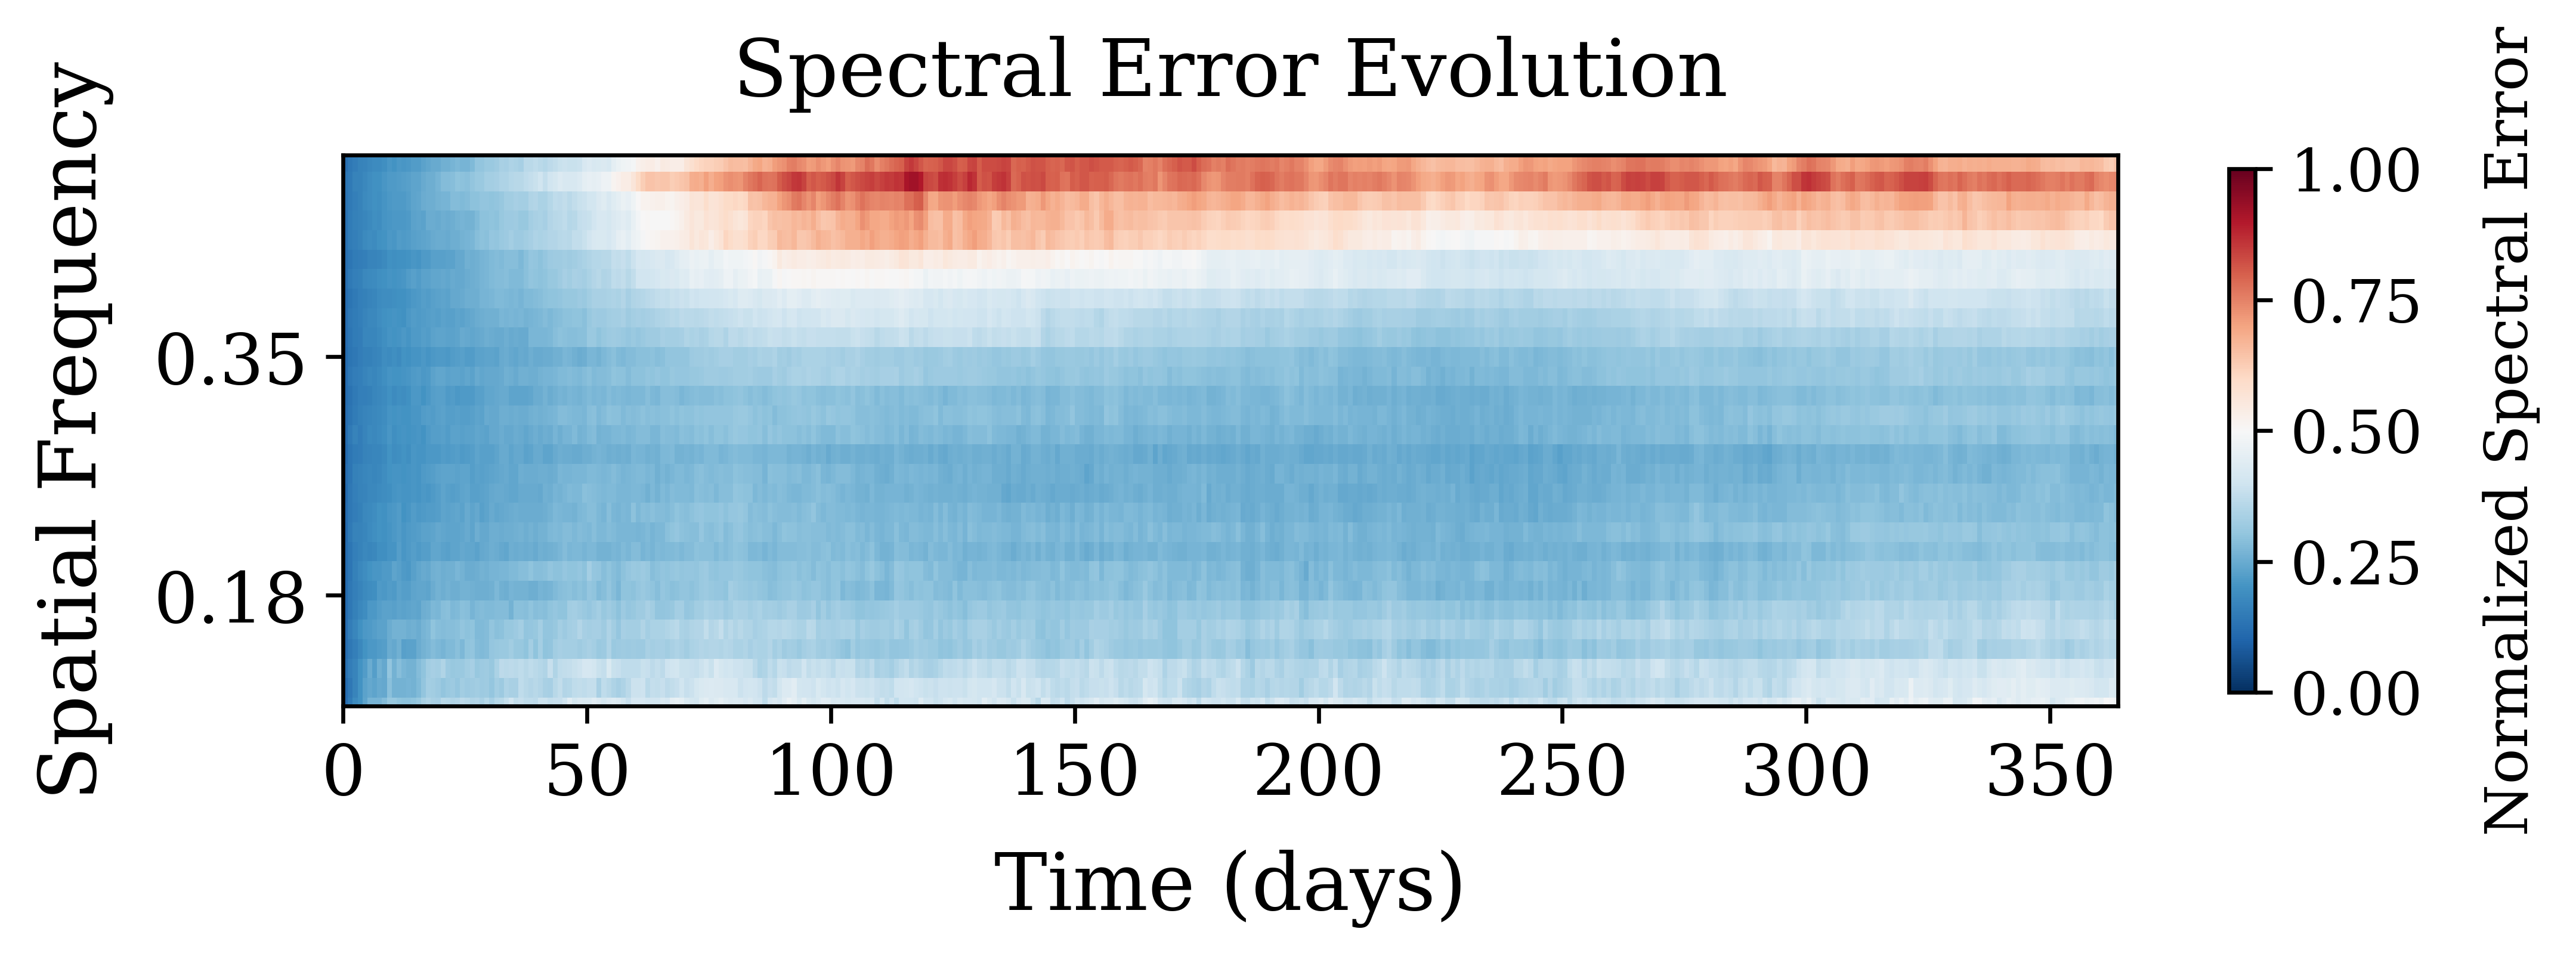

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.font_manager as fm

plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams['mathtext.fontset'] = 'stix'

backbone = 'baselines_triton_20250326_exp1'
var_index = 2  
total_days = 364
save_path = 'spectral_error_analysis.png'

spectral_errors = np.zeros((total_days, 49))  

height, width = 180, 360
freq_x = np.fft.fftshift(np.fft.fftfreq(width))
freq_y = np.fft.fftshift(np.fft.fftfreq(height))
fx, fy = np.meshgrid(freq_x, freq_y)
freq_radius = np.sqrt(fx**2 + fy**2)

max_freq = np.sqrt(0.5**2 + 0.5**2)  
freq_bins = np.linspace(0, max_freq, num=50)
freq_centers = (freq_bins[:-1] + freq_bins[1:]) / 2

for day in range(total_days):
    ground_truth = np.load(f'{backbone}_true_label_step_{day}.npy')
    prediction = np.load(f'{backbone}_prediction_step_{day}.npy')
    
    gt_temp = ground_truth[var_index]
    pred_temp = prediction[var_index]
    
    error_field = np.abs(gt_temp - pred_temp)
    
    fft_error = np.fft.fft2(error_field)
    fft_shifted = np.fft.fftshift(fft_error)
    magnitude = np.abs(fft_shifted)
    
    hist_values, _ = np.histogram(freq_radius.flatten(),
                                bins=freq_bins,
                                weights=magnitude.flatten())
    
    spectral_errors[day] = hist_values

max_value = spectral_errors.max()
spectral_errors_normalized = spectral_errors / max_value

fig = plt.figure(figsize=(8, 2), dpi=600)
gs = GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])

im = ax.imshow(spectral_errors_normalized.T, 
             aspect='auto', 
             origin='lower',
             extent=[0, total_days, freq_centers[0], freq_centers[-1]],
             cmap='RdBu_r',
             vmin=0, vmax=1)

ax.set_xlabel('Time (days)', fontsize=16, labelpad=8)  
ax.set_ylabel('Spatial Frequency', fontsize=16, labelpad=8)
ax.tick_params(axis='both', labelsize=14)  
ax.set_title('Spectral Error Evolution', fontsize=16, pad=12)



ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_yticks(np.linspace(freq_centers[0], freq_centers[-1], 5))
ax.set_ylim(0.1, 0.5) 
cbar = fig.colorbar(im, ax=ax, shrink=0.95)
cbar.set_label('Normalized Spectral Error', 
              fontsize=12,
              labelpad=12)
cbar.ax.tick_params(labelsize=12)

plt.show()
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.close()